# <h1><center>Data Visualization For Titanic Dataset</center></h1>

In [1]:
#Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics 

# Data Preprocessing

In [2]:
#Loading The Dataset
titanic= sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#Checking Infodrmation of variables of the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


Text(0.5, 1, 'Finding missing values')

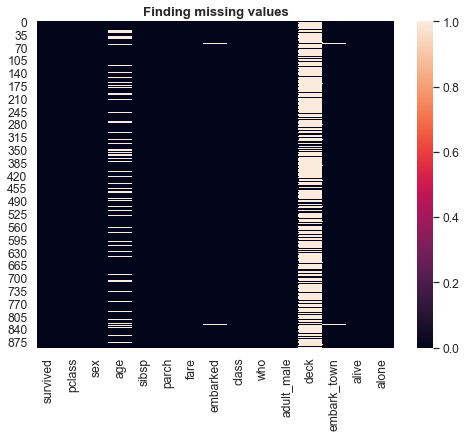

In [4]:
#Finding the missing values using heatmap 
plt.figure(figsize=(8,6))
sns.set(font_scale=1.1)
sns.heatmap(titanic.isna()).set_title("Finding missing values", fontweight='bold')

In [5]:
#Finding the total missing values in the dataset
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Data Cleaning

In [6]:
#Data cleaning
titanic['age'].fillna(titanic.groupby(["pclass"])['age'].transform("mean"),inplace=True)
titanic["embark_town"] = titanic["embark_town"].fillna(value= statistics.mode(titanic["embark_town"]))
titanic.drop(["deck","embarked",'alive'], axis=1, inplace= True)
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [7]:
#creating a function to create a derived column for mothers
def is_married(df):
    if ( df["who"] == "woman" ) & ( df["alone"] == False ) & ( df["sibsp"] == 1 ) & (df["parch"] > 0):
        return 1
    else:
        return 0


In [8]:
#Adding the derived variable to the dataframe
titanic["mother"] = titanic[["who", "alone", "sibsp", "parch"]].apply(is_married, axis=1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone,mother
0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,False,0
1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,False,0
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,True,0
3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,False,0
4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,True,0


In [9]:
#Creating another derived ariable for the total number of people in a group
titanic["group_size"] = titanic["sibsp"]+titanic["parch"]+1
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone,mother,group_size
0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,False,0,2
1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,False,0,2
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,True,0,1
3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,False,0,2
4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,True,0,1


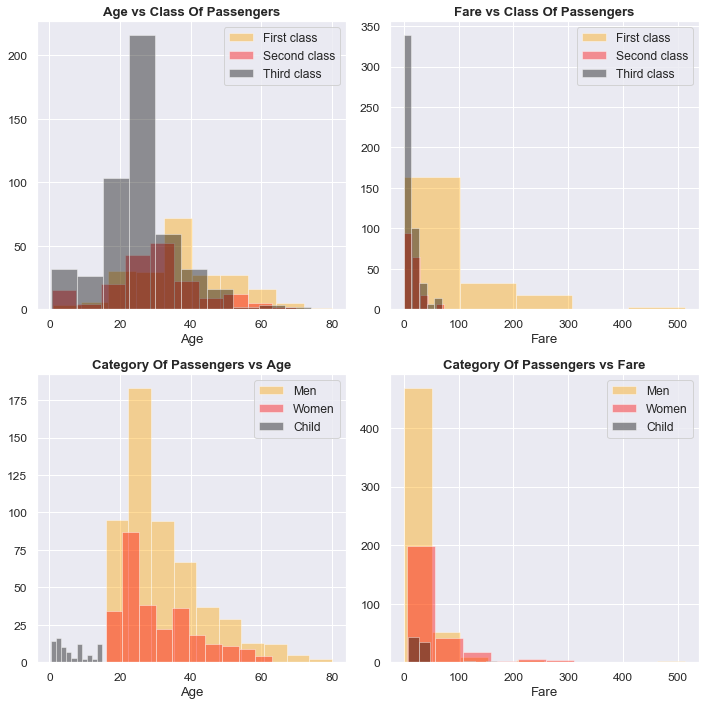

In [10]:
#Creating distributions
fig, ax= plt.subplots(nrows=2, ncols=2, figsize=(10,10))
sns.set(font_scale = 1.1)

#Age vs Class
sns.distplot(titanic[titanic["class"]=="First"]["age"],ax=ax[0,0],color="orange",bins=10, kde=False,label="First class").set_title("Age vs Class Of Passengers",weight="bold")
sns.distplot(titanic[titanic["class"]=="Second"]["age"],ax=ax[0,0],color="red",bins=10,kde=False,label="Second class")
sns.distplot(titanic[titanic["class"]=="Third"]["age"],ax=ax[0,0],color="black",bins=10,kde=False,label="Third class")
ax[0,0].legend()
ax[0,0].set_xlabel("Age")
ax[0,0].tick_params(labelsize=12)

#Fare vs Class
sns.distplot(titanic[titanic["class"]=="First"]["fare"],color="orange",ax=ax[0,1], bins=5, kde=False,label="First class").set_title("Fare vs Class Of Passengers",weight="bold")
sns.distplot(titanic[titanic["class"]=="Second"]["fare"],color="red",ax=ax[0,1], bins=5,kde=False,label="Second class")
sns.distplot(titanic[titanic["class"]=="Third"]["fare"],color="black",ax=ax[0,1], bins=5,kde=False,label="Third class")
ax[0,1].legend()
ax[0,1].set_xlabel("Fare")
ax[0,1].tick_params(labelsize=12)


#Categorywise Age
sns.distplot(titanic[titanic["who"]=="man"]["age"],ax=ax[1,0],color="orange",bins=10, kde=False,label="Men").set_title("Category Of Passengers vs Age",weight="bold")
sns.distplot(titanic[titanic["who"]=="woman"]["age"],ax=ax[1,0],color="red",bins=10,kde=False,label="Women")
sns.distplot(titanic[titanic["who"]=="child"]["age"],ax=ax[1,0],color="black",bins=10,kde=False,label="Child")
ax[1,0].legend()
ax[1,0].set_xlabel("Age")
ax[1,0].tick_params(labelsize=12)


#Categorywise Fare
sns.distplot(titanic[titanic["who"]=="man"]["fare"],ax=ax[1,1],color="orange",bins=10, kde=False,label="Men").set_title("Category Of Passengers vs Fare",weight="bold")
sns.distplot(titanic[titanic["who"]=="woman"]["fare"],ax=ax[1,1],color="red",bins=10,kde=False,label="Women")
sns.distplot(titanic[titanic["who"]=="child"]["fare"],ax=ax[1,1],color="black",bins=10,kde=False,label="Child")
ax[1,1].legend()
ax[1,1].set_xlabel("Fare")
ax[1,1].tick_params(labelsize=12)


plt.tight_layout()

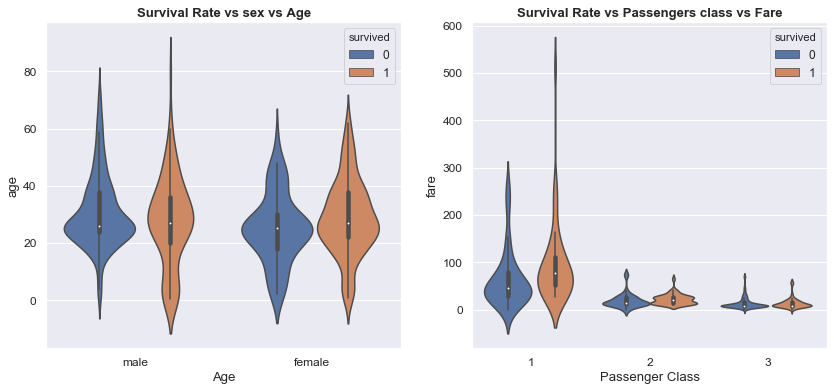

In [11]:
#Survival rate among different class of passengers  and gender according to their age and fare
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.set(font_scale = 1.1)

#Survival rate Vs age vs sex
sns.violinplot(titanic["sex"], titanic['age'],hue=titanic['survived'],ax=ax[0]).set_title("Survival Rate vs sex vs Age", fontweight='bold')
ax[0].set_xlabel("Age")
ax[0].tick_params(labelsize=12)

#Survival rate Vs Passenegers class vs Fare
sns.violinplot(titanic["pclass"], titanic['fare'],hue=titanic['survived'],ax=ax[1]).set_title("Survival Rate vs Passengers class vs Fare", fontweight='bold')
ax[1].set_xlabel("Passenger Class")
ax[1].tick_params(labelsize=12)

Text(0, 0.5, 'Fare')

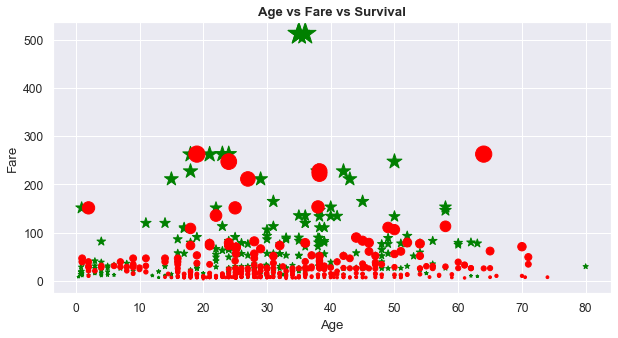

In [12]:
#Age vs fare vs survival
plt.figure(figsize=(10,5))
sns.set(font_scale = 1.1)

plt.scatter(titanic[titanic["survived"]==1]['age'],titanic[titanic["survived"]==1]['fare'],c='green',marker="*", s=titanic[titanic['survived']==1]['fare'])
plt.scatter(titanic[titanic["survived"]==0]['age'],titanic[titanic["survived"]==0]['fare'],c='red',s=titanic[titanic['survived']==0]['fare'], marker= "o")
plt.title("Age vs Fare vs Survival", fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Fare")


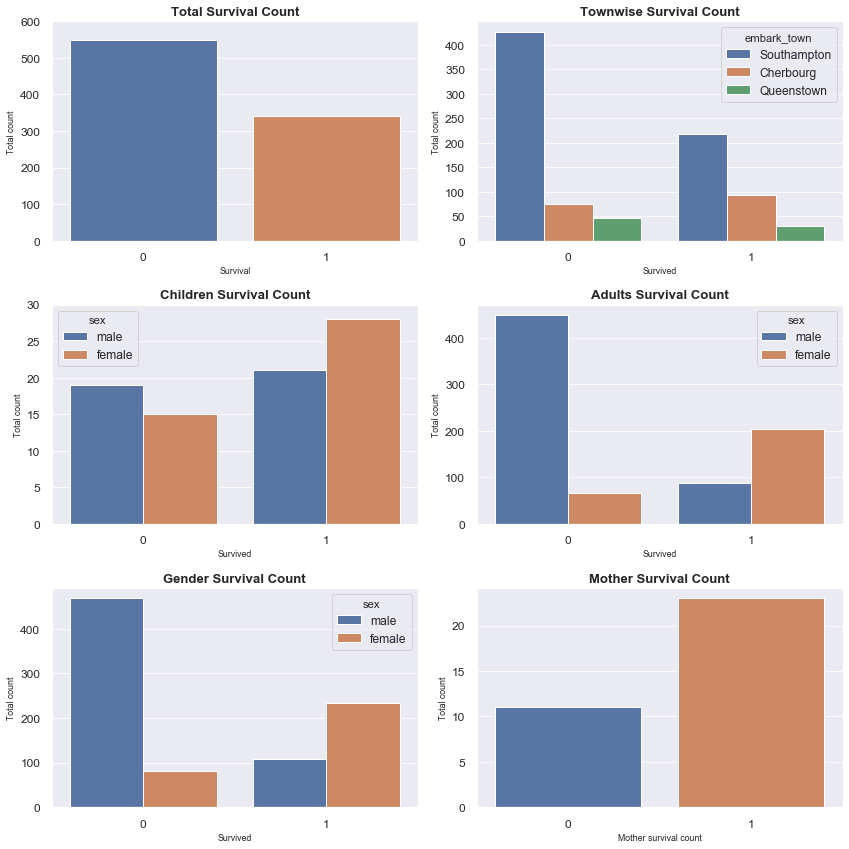

In [13]:
#Creating plots for survival rate among different groups and categories
plt.style.use('seaborn-paper')
fig, ax =plt.subplots(3,2, figsize=(12,12))
sns.set(font_scale = 1.1)

#Total survival count
sns.countplot(titanic["survived"], ax= ax[0,0]).set_title("Total Survival Count",fontweight='bold')
ax[0,0].set_xlabel("Survival")
ax[0,0].set_ylabel("Total count")
ax[0,0].set_ylim([0,600])
ax[0,0].tick_params(labelsize=12)

#Twonwise survival count
sns.countplot(titanic["survived"],hue=titanic["embark_town"], ax= ax[0,1]).set_title("Townwise Survival Count",fontweight='bold')
ax[0,1].set_xlabel("Survived")
ax[0,1].set_ylabel("Total count")
ax[0,1].tick_params(labelsize=12)

#Children survival count
sns.countplot(titanic[(titanic["who"]=="child")]["survived"], hue=titanic["sex"], ax= ax[1,0]).set_title("Children Survival Count",fontweight='bold')
ax[1,0].set_xlabel("Survived")
ax[1,0].set_ylim([0,30])
ax[1,0].set_ylabel("Total count")
ax[1,0].tick_params(labelsize=12)

#Adults survival count
sns.countplot(titanic[(titanic["who"]!="child")]["survived"],hue=titanic["sex"] ,ax= ax[1,1]).set_title("Adults Survival Count",fontweight='bold')
ax[1,1].set_xlabel("Survived")
ax[1,1].set_ylabel("Total count")
ax[1,1].tick_params(labelsize=12)

#Survival count according to gender
sns.countplot(titanic["survived"], hue= titanic["sex"], ax= ax[2,0]).set_title("Gender Survival Count",fontweight='bold')
ax[2,0].set_xlabel("Survived")
ax[2,0].set_ylabel("Total count")
ax[2,0].tick_params(labelsize=12)

#Survival count for mothers
sns.countplot(titanic[titanic["mother"]== 1]["survived"], ax=ax[2,1]).set_title("Mother Survival Count",fontweight='bold')
ax[2,1].set_xlabel("Mother survival count")
ax[2,1].set_ylabel("Total count")
ax[2,1].tick_params(labelsize=12)


plt.tight_layout()



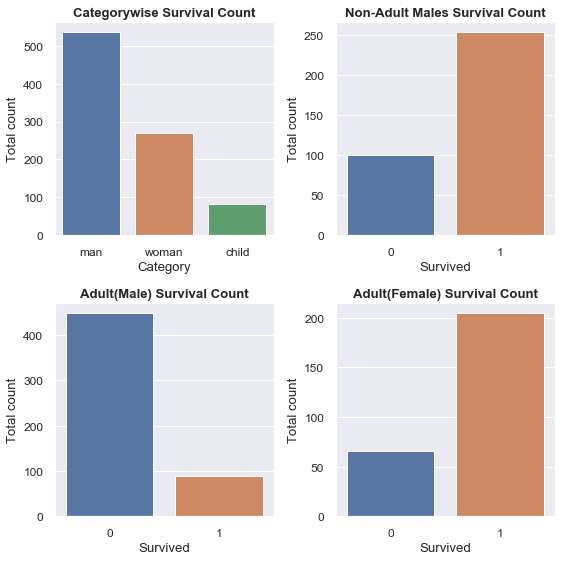

In [14]:
fig,ax= plt.subplots(nrows=2,ncols=2,figsize=(8,8))
#Total survival rate among different categories of people
sns.countplot(titanic["who"],ax=ax[0,0]).set_title("Categorywise Survival Count",fontweight='bold')
ax[0,0].set_xlabel("Category")
ax[0,0].set_ylabel("Total count")
ax[0,0].tick_params(labelsize=12)

#Female or child survival rate
sns.countplot(titanic[titanic['adult_male']==False]['survived'],ax=ax[0,1]).set_title("Non-Adult Males Survival Count",fontweight='bold')
ax[0,1].set_xlabel("Survived")
ax[0,1].set_ylabel("Total count")
ax[0,1].tick_params(labelsize=12)

#adult male survival rate
sns.countplot(titanic[titanic['adult_male']==True]['survived'],ax=ax[1,0]).set_title("Adult(Male) Survival Count",fontweight='bold')
ax[1,0].set_xlabel("Survived")
ax[1,0].set_ylabel("Total count")
ax[1,0].tick_params(labelsize=12)

#adult female survival rate
sns.countplot(titanic[(titanic['who']=="woman")]['survived'], ax=ax[1,1]).set_title("Adult(Female) Survival Count",fontweight='bold')
ax[1,1].set_xlabel("Survived")
ax[1,1].set_ylabel("Total count")
ax[1,1].tick_params(labelsize=12)


plt.tight_layout()

In [15]:
titanic['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

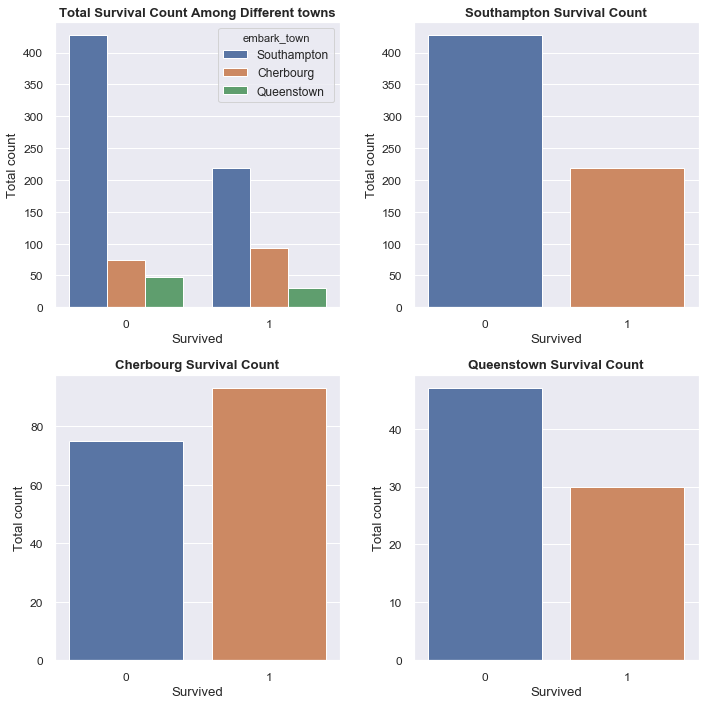

In [16]:
#Survival rate among passengers from different towns
fig,ax= plt.subplots(nrows=2, ncols=2, figsize=(10,10))

#Townwise survival rate
sns.countplot(titanic["survived"],hue=titanic["embark_town"], ax= ax[0,0]).set_title("Total Survival Count Among Different towns",fontweight='bold')
ax[0,0].set_xlabel("Survived")
ax[0,0].set_ylabel("Total count")
ax[0,0].tick_params(labelsize=12)

#Southampton Survival rate
sns.countplot(titanic[titanic['embark_town']=="Southampton"]['survived'], ax= ax[0,1]).set_title("Southampton Survival Count",fontweight='bold')
ax[0,1].set_xlabel("Survived")
ax[0,1].set_ylabel("Total count")
ax[0,1].tick_params(labelsize=12)

#Cherbourg Survival rate
sns.countplot(titanic[titanic['embark_town']=="Cherbourg"]['survived'], ax= ax[1,0]).set_title("Cherbourg Survival Count",fontweight='bold')
ax[1,0].set_xlabel("Survived")
ax[1,0].set_ylabel("Total count")
ax[1,0].tick_params(labelsize=12)

#Quessntown survival rate
sns.countplot(titanic[titanic['embark_town']=="Queenstown"]['survived'], ax= ax[1,1]).set_title("Queenstown Survival Count",fontweight='bold')
ax[1,1].set_xlabel("Survived")
ax[1,1].set_ylabel("Total count")
ax[1,1].tick_params(labelsize=12)

plt.tight_layout()

In [17]:
titanic['class'].unique()

[Third, First, Second]
Categories (3, object): [Third, First, Second]

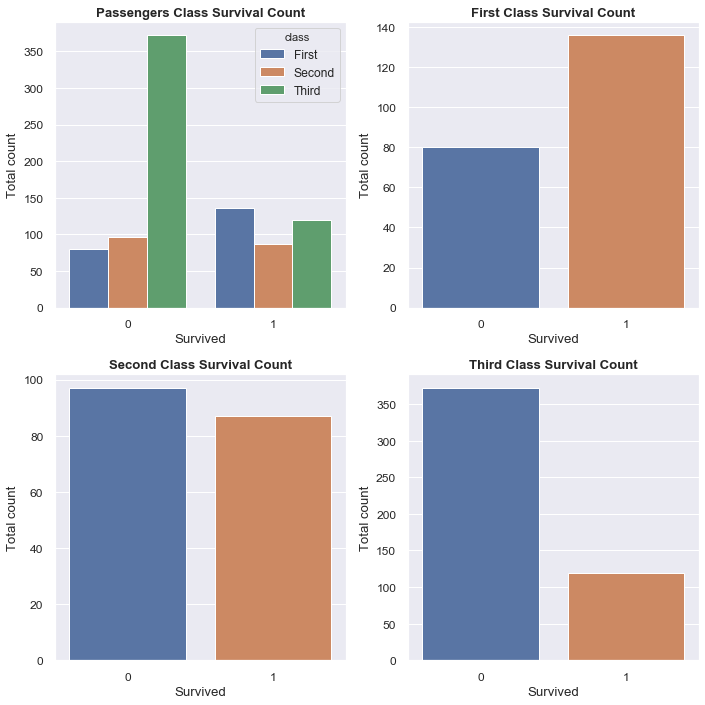

In [18]:
#Survival rate among different passenger classes
fig, ax= plt.subplots(nrows=2,ncols=2,figsize=(10,10))
sns.set(font_scale = 1.1)

#Pclass survival rate
sns.countplot(titanic["survived"],hue=titanic["class"],ax=ax[0,0]).set_title("Passengers Class Survival Count", fontweight='bold')
ax[0,0].set_xlabel("Survived")
ax[0,0].set_ylabel("Total count")
ax[0,0].tick_params(labelsize=12)

#First class survival rate
sns.countplot(titanic[titanic["class"]=="First"]['survived'],ax=ax[0,1]).set_title("First Class Survival Count", fontweight='bold')
ax[0,1].set_xlabel("Survived")
ax[0,1].set_ylabel("Total count")
ax[0,1].tick_params(labelsize=12)


#Second class survival rate
sns.countplot(titanic[titanic["class"]=="Second"]['survived'],ax=ax[1,0]).set_title("Second Class Survival Count", fontweight='bold')
ax[1,0].set_xlabel("Survived")
ax[1,0].set_ylabel("Total count")
ax[1,0].tick_params(labelsize=12)

#Third class survival rate
sns.countplot(titanic[titanic["class"]=="Third"]['survived'],ax=ax[1,1]).set_title("Third Class Survival Count", fontweight='bold')
ax[1,1].set_xlabel("Survived")
ax[1,1].set_ylabel("Total count")
ax[1,1].tick_params(labelsize=12)

plt.tight_layout()

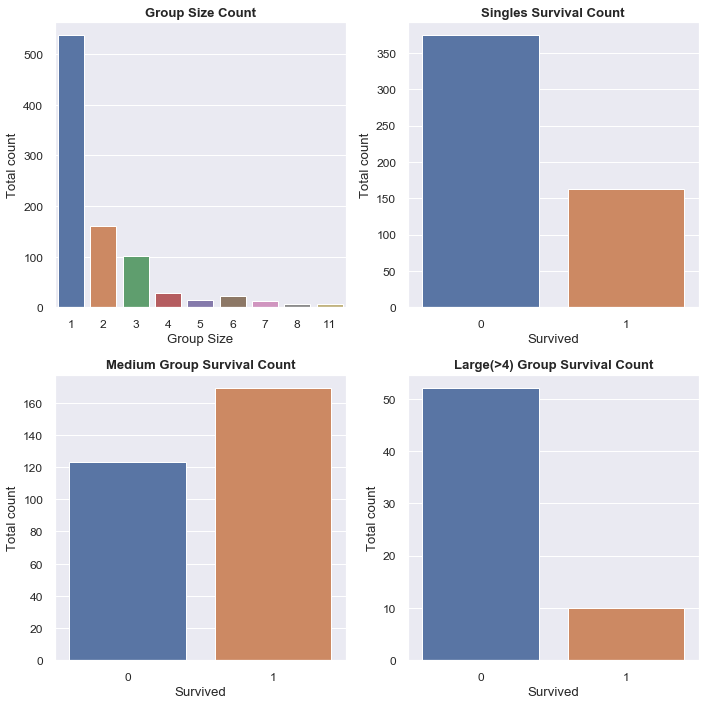

In [19]:
#Group size frequencies and survival rate accorning to the group size.
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
sns.set(font_scale = 1.1)
#Group size count
sns.countplot(titanic["group_size"], ax=ax[0,0]).set_title("Group Size Count", fontweight="bold")
ax[0,0].set_xlabel("Group Size")
ax[0,0].set_ylabel("Total count")
ax[0,0].tick_params(labelsize=12)

#Singles survival count
sns.countplot(titanic[titanic["group_size"]==1]['survived'], ax=ax[0,1]).set_title("Singles Survival Count", fontweight="bold")
ax[0,1].set_xlabel("Survived")
ax[0,1].set_ylabel("Total count")
ax[0,1].tick_params(labelsize=12)

#Medium group survival count
sns.countplot(titanic[(titanic["group_size"]>1) & (titanic["group_size"]<5)]['survived'], ax=ax[1,0]).set_title("Medium Group Survival Count", fontweight="bold")
ax[1,0].set_xlabel("Survived")
ax[1,0].set_ylabel("Total count")
ax[1,0].tick_params(labelsize=12)

#Large group survival count
sns.countplot(titanic[titanic["group_size"]>4]['survived'], ax=ax[1,1]).set_title("Large(>4) Group Survival Count", fontweight="bold")
ax[1,1].set_xlabel("Survived")
ax[1,1].set_ylabel("Total count")
ax[1,1].tick_params(labelsize=12)

plt.tight_layout()